### 공공데이터 api
- 제공하는 지자체, 정부부처마다 접근 url 이 상이하다.
- 데이터별로 필요 내용 확인
- 요청 변수 확인 후 사용

### 국립 중앙 의료원 제공 전국 약국정보 data
- 연결 url : http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire

In [1]:
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire'
servicekey = 'vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D'

In [3]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
QT = '1' # 약국 영업 요일 전달
QN = quote('삼성약국') # 검색하고자 하는 약국의 이름(부분)
Q0 = quote('서울특별시') # 광역시도
Q1 = quote('강남구') # 시군구
ORD = 'NAME' # 순서, 정렬
numOfRows = '10' # 추출 data 수

In [4]:
paramset = '?servicekey=' + servicekey + \
           '&QT=' + QT + \
           '&QN=' + QN + \
           '&Q0=' + Q0 + \
           '&Q1=' + Q1 + \
           '&ORD=' + ORD + '&numOfRows=' + numOfRows
paramset

'?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&ORD=NAME&numOfRows=10'

In [5]:
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&ORD=NAME&numOfRows=10'

In [6]:
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')
bs_obj

C:\Users\gherwt\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><dutyaddr>서울특별시 강남구 일원로 53 (일원동) </dutyaddr><dutymapimg>소림빌딩 1층</dutymapimg><dutyname>E-삼성약국</dutyname><dutytel1>02-3412-1254</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>1900</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>1900</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1300</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1104799</hpid><postcdn1>063</postcdn1><postcdn2>43 </postcdn2><rnum>1</rnum><wgs84lat>37.48926299528938</wgs84lat><wgs84lon>127.08181088280385</wgs84lon></item><item><dutyaddr>서울특별시 강남구 일원로 45, 대훈빌딩 1층 (일원동)</dutyaddr><dutymapimg>대청역 4번출구에서 423m</dutymapimg><dutyname>무지개삼성약국</dutyname><dutytel1>02-2226-5467</dutytel1><dutytime1c>1900</dutyti

In [7]:
len(bs_obj.findAll('item')) # 강남구에 4개의 약국에 삼성약국이라는 이름이 들어간다.
bs_obj.findAll('item')[0].dutyname.text # 데이터 하나만 가져와서 확인한다.

'E-삼성약국'

In [58]:
bs_obj.findAll('item')[0]

<item><dutyaddr>서울특별시 강남구 헌릉로571길 7, 강남레체 1층 101호 (세곡동)</dutyaddr><dutyname>100세건강약국</dutyname><dutytel1>02-445-1460</dutytel1><dutytime1c>2000</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>2000</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>2000</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>2000</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>2000</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1900</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1109587</hpid><postcdn1>063</postcdn1><postcdn2>76 </postcdn2><rnum>1</rnum><wgs84lat>37.4660448664795</wgs84lat><wgs84lon>127.101366881801</wgs84lon></item>

In [8]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
QT = '1' # 약국 영업 요일 전달
QN = quote('삼성약국') # 검색하고자 하는 약국의 이름(부분)
Q0 = quote('서울특별시') # 광역시도
Q1 = quote('강남구') # 시군구
ORD = 'NAME' # 순서, 정렬
numOfRows = '6000' # 추출 data 수

### 서울시의 모든 약국 정보 추출

In [217]:
paramset = '?servicekey=' + servicekey + \
           '&Q0=' + Q0 + \
           '&ORD=' + ORD + '&numOfRows=' + numOfRows
paramset

'?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [218]:
url = endpoint + paramset

In [219]:
res = requests.get(url)
bs_obj = BeautifulSoup(res.content, 'html.parser')
res_fin = bs_obj.findAll('item')
len(res_fin)

C:\Users\gherwt\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


5407

In [223]:
# 서울시의 약국 정보 data df 에 저장
name = [item.dutyname.text for item in res_fin]
addr = [item.dutyaddr.text for item in res_fin]
tel = [item.dutytel1.text for item in res_fin]

In [221]:
df_fin = pd.DataFrame({'약국명' : name, '주소' : addr, '전화번호' : tel})
df_fin.tail()

,약국명,주소,전화번호
5402,힐스테이트솔약국,강서구,02-2695-6121
5403,힘찬약국,도봉구,02-996-9114
5404,힘찬약국,중구,02-2279-7588
5405,힘찬약국,광진구,02-454-1221
5406,힘챤약국,성북구,02-942-2088


In [222]:
df_fin.to_csv('crawl_data/서울시_약국정보.csv')

In [ ]:
### 서울시 약국 중 월요일 야간에 운영하는 약국 정보

In [27]:
# 9시 이후 야간에 운영하는 약국을 찾기 위한 조건 설정
# dutytime1c 태그의 텍스트를 활용해서 조건 확인
int(res_fin[1].dutytime1c.text) > 2100

False

In [49]:
# 초기 변수 생성
name = []
adr = []
tel = []
c_time_li = []
count = 0

In [50]:
for item in res_fin:
    tmp_time = item.find('dutytime1c')
    if tmp_time != None:
        c_time =  int(tmp_time.text)
        if c_time > 2100:
            count += 1
            name.append(item.find('dutyname').text)
            adr.append(item.find('dutyaddr').text)
            tel.append(item.find('dutytel1').text)
            c_time_li.append(item.find('dutytime1c').text)

In [52]:
df_mon_night = pd.DataFrame({'약국명' : name, '주소' : adr, '전화번호' : tel, '종료시간' : c_time_li})
df_mon_night.tail()

,약국명,주소,전화번호,종료시간
747,휴베이스하이약국,"서울특별시 중구 명동9가길 14, 메트로호텔 1층 (을지로2가)",070-7778-8275,2200
748,휴베이스하이약국,"서울특별시 중구 명동9가길 14, 메트로호텔 1층 (을지로2가)",070-7798-8275,2200
749,흥명약국,서울특별시 동대문구 고산자로30길 56 (용두동),02-963-0617,2300
750,희망약국,"서울특별시 관악구 쑥고개로 53, 1층 (봉천동)",02-874-9488,2130
751,희망약국,"서울특별시 노원구 동일로230가길 15, 103호 (상계동, 우방아파트상가)",02-939-9831,2200


In [53]:
df_mon_night.to_csv('crawl_data/서울시월요일심야영업약국정보.csv')

### 연습문제
- 슬랙으로 코드 제출
- 서울시에서 토요일이나 일요일에 영업하는 약국의 정보를 추출
    - 약국명, 주소, 전화번호, 토요일영업여부, 일요일영업여부, 종료시간
    - 토요일/일요일영업여부값은 : Y/N
- 서울시 각 구별로 약국의 수를 비교하는 막대그래프 생성

In [170]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
QT = '6' # 약국 영업 요일 전달
Q0 = quote('서울특별시') # 광역시도
ORD = 'NAME' # 순서, 정렬
numOfRows = '10' # 추출 data 수

In [171]:
paramset = '?servicekey=' + servicekey + \
           '&QT=' + QT + \
           '&Q0=' + Q0 + \
           '&ORD=' + ORD + '&numOfRows=' + numOfRows
paramset

'?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&QT=6&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=10'

In [172]:
# 초기 변수 생성
name = []
adr = []
tel = []
c_time_li = []
open = []
count = 0

In [173]:
for item in res_fin:
    tmp_time = item.find('dutytime1c')
    if tmp_time != None:
        c_time = 'yes'
        count += 1
        name.append(item.find('dutyname').text)
        adr.append(item.find('dutyaddr').text)
        tel.append(item.find('dutytel1').text)
        c_time_li.append(item.find('dutytime1c').text)
        open.append(c_time)

In [174]:
df_sat = pd.DataFrame({'약국명' : name, '주소' : adr, '전화번호' : tel, '토요일종료시간' : c_time_li, '토요일영업여부' : open})
df_sat.tail()

,약국명,주소,전화번호,토요일종료시간,토요일영업여부
5393,힐스테이트솔약국,"서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)",02-2695-6121,1930,yes
5394,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114,2030,yes
5395,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588,2000,yes
5396,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221,1930,yes
5397,힘챤약국,서울특별시 성북구 보국문로 16-1,02-942-2088,1900,yes


In [175]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
QT = '7' # 약국 영업 요일 전달
Q0 = quote('서울특별시') # 광역시도
ORD = 'NAME' # 순서, 정렬
numOfRows = '10' # 추출 data 수

In [176]:
paramset = '?servicekey=' + servicekey + \
           '&QT=' + QT + \
           '&Q0=' + Q0 + \
           '&ORD=' + ORD + '&numOfRows=' + numOfRows
paramset

'?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&QT=7&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=10'

In [177]:
# 초기 변수 생성
name = []
adr = []
tel = []
c_time_li = []
open = []
count = 0

In [178]:
for item in res_fin:
    tmp_time = item.find('dutytime1c')
    if tmp_time != None:
        c_time = 'yes'
        count += 1
        name.append(item.find('dutyname').text)
        adr.append(item.find('dutyaddr').text)
        tel.append(item.find('dutytel1').text)
        c_time_li.append(item.find('dutytime1c').text)
        open.append(c_time)

In [179]:
df_sun = pd.DataFrame({'약국명' : name, '주소' : adr, '전화번호' : tel, '일요일종료시간' : c_time_li, '일요일영업여부' : open})
df_sun.tail()

,약국명,주소,전화번호,일요일종료시간,일요일영업여부
5393,힐스테이트솔약국,"서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)",02-2695-6121,1930,yes
5394,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114,2030,yes
5395,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588,2000,yes
5396,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221,1930,yes
5397,힘챤약국,서울특별시 성북구 보국문로 16-1,02-942-2088,1900,yes


In [183]:
df = pd.merge(df_sat, df_sun, how='inner', on=None)
df.to_csv('crawl_data/주말약국정보.csv')

### 구별 약국정보

In [224]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
Q0 = quote('서울특별시') # 광역시도
ORD = 'NAME' # 순서, 정렬
numOfRows = '6000' # 추출 data 수

In [225]:
paramset = '?servicekey=' + servicekey + \
           '&Q0=' + Q0 + \
           '&ORD=' + ORD + '&numOfRows=' + numOfRows
paramset

'?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [226]:
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?servicekey=vpA5w%2Frqnqv5OVUvdS1jzdjrdM3lN%2B3Omjbnx64dXdMBMpL7xbLreYIFaigNiexQelZHSsPNMGL3A91tHKF1YQ%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [227]:
res = requests.get(url)
bs_obj = BeautifulSoup(res.content, 'html.parser')
res_fin = bs_obj.findAll('item')
len(res_fin)

C:\Users\gherwt\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


5407

In [228]:
name = [item.dutyname.text for item in res_fin]
addr = [item.dutyaddr.text[6:9] for item in res_fin]
tel = [item.dutytel1.text for item in res_fin]

In [229]:
df = pd.DataFrame({'약국명' : name, '주소' : addr, '전화번호' : tel})
df

,약국명,주소,전화번호
0,100세건강약국,강남구,02-445-1460
1,100세약국,영등포,02-2678-8217
2,13층약국,중구,070-7718-1316
3,1898광장약국,중구,02-0000-0000
4,1번약국,관악구,02-872-7583
...,...,...,...
5402,힐스테이트솔약국,강서구,02-2695-6121
5403,힘찬약국,도봉구,02-996-9114
5404,힘찬약국,중구,02-2279-7588
5405,힘찬약국,광진구,02-454-1221


In [236]:
from matplotlib import pyplot as plt
import numpy as np

In [237]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

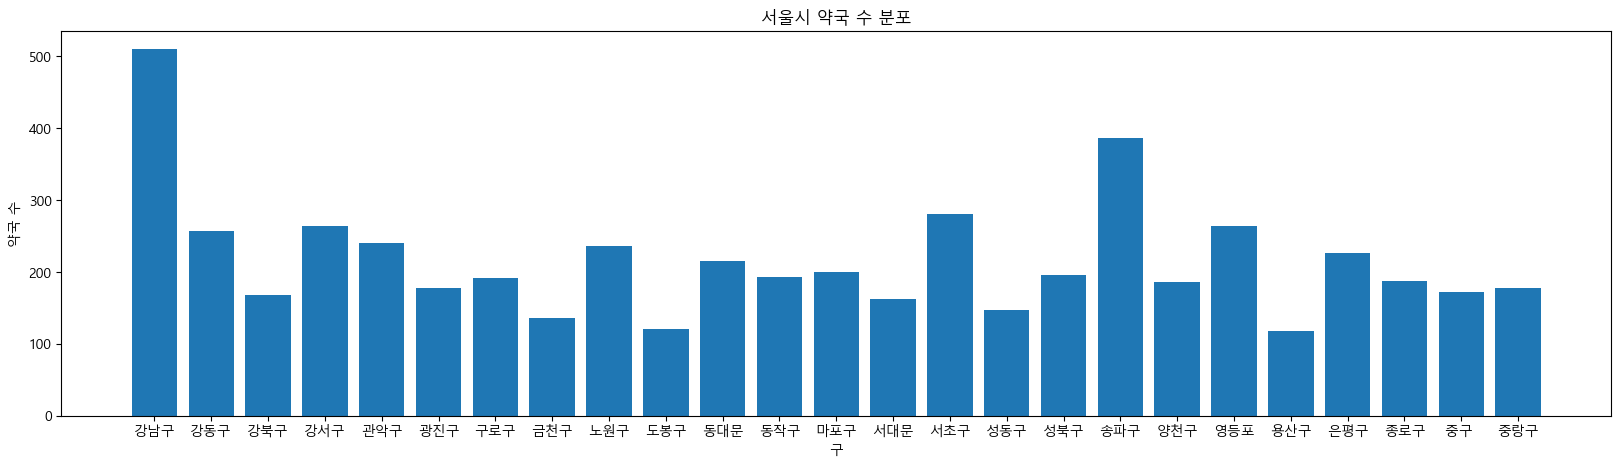

In [240]:
# 각 구별로 약국 수를 계산합니다.
df_grouped = df.groupby('주소')['약국명'].count()

# 그래프를 그립니다.
plt.figure(figsize=(20, 5))
plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel('구')
plt.ylabel('약국 수')
plt.title('서울시 약국 수 분포')
plt.show()